**Colab Notebook obtained from ROBOFLOW notebook examples.**

**Mount your google drive:**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


If you want to **save** the database and the model, create a folder at your drive.

*** Please, define your FOLDER NAME.

In [ ]:
import os
# define your folder name:
HOME = '/content/drive/MyDrive/"folder name"/'
!mkdir {HOME}
print(HOME)
%cd {HOME}
!ls

/content/drive/MyDrive/WSprueba/
/content/drive/MyDrive/WSprueba


**Install the libraries.**

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.6/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

**Create a folder to save the datasets.**

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets
!ls



/content/drive/MyDrive/WSprueba/datasets


In [ ]:
print(os.path.abspath(HOME))
#print(os.path.abspath(dataset))


/content/drive/MyDrive/WSprueba


**Upload the Roboflow dataset to be trained.**

*** We have to change the roboflow data:

In [ ]:
#!pip install roboflow

#from roboflow import Roboflow
#rf = Roboflow(api_key="0n1XUqMhmf9WWNiwWI3B")
#project = rf.workspace("datalab-xz0n5").project("raor")
#dataset = project.version(1).download("yolov8")



loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.28, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to raor-1 in yolov8:: 100%|██████████| 162/162 [00:01<00:00, 152.70it/s]


In [ ]:
dataset.location

'/content/drive/MyDrive/WSprueba/datasets/raor-1'

**TRAIN your model.**

*** Probe different pre-trained versions, and check the best and the faster.

In [ ]:
%cd {HOME}

#!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs=5 imgsz=250

!yolo task=detect mode=train model=yolov8x.pt data={dataset.location}/data.yaml epochs=5 imgsz=250


/content/drive/MyDrive/WSprueba
100% 131M/131M [00:00<00:00, 173MB/s]
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/drive/MyDrive/WSprueba/datasets/raor-1/data.yaml, epochs=5, patience=50, batch=16, imgsz=250, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=tor

Now, your model is saved in "/content/drive/MyDrive/"your folder"/runs/segment/train"

*** Each train will be save at different folders...train1 train2...


Lets evaluate the model:

/content/drive/MyDrive/WSprueba


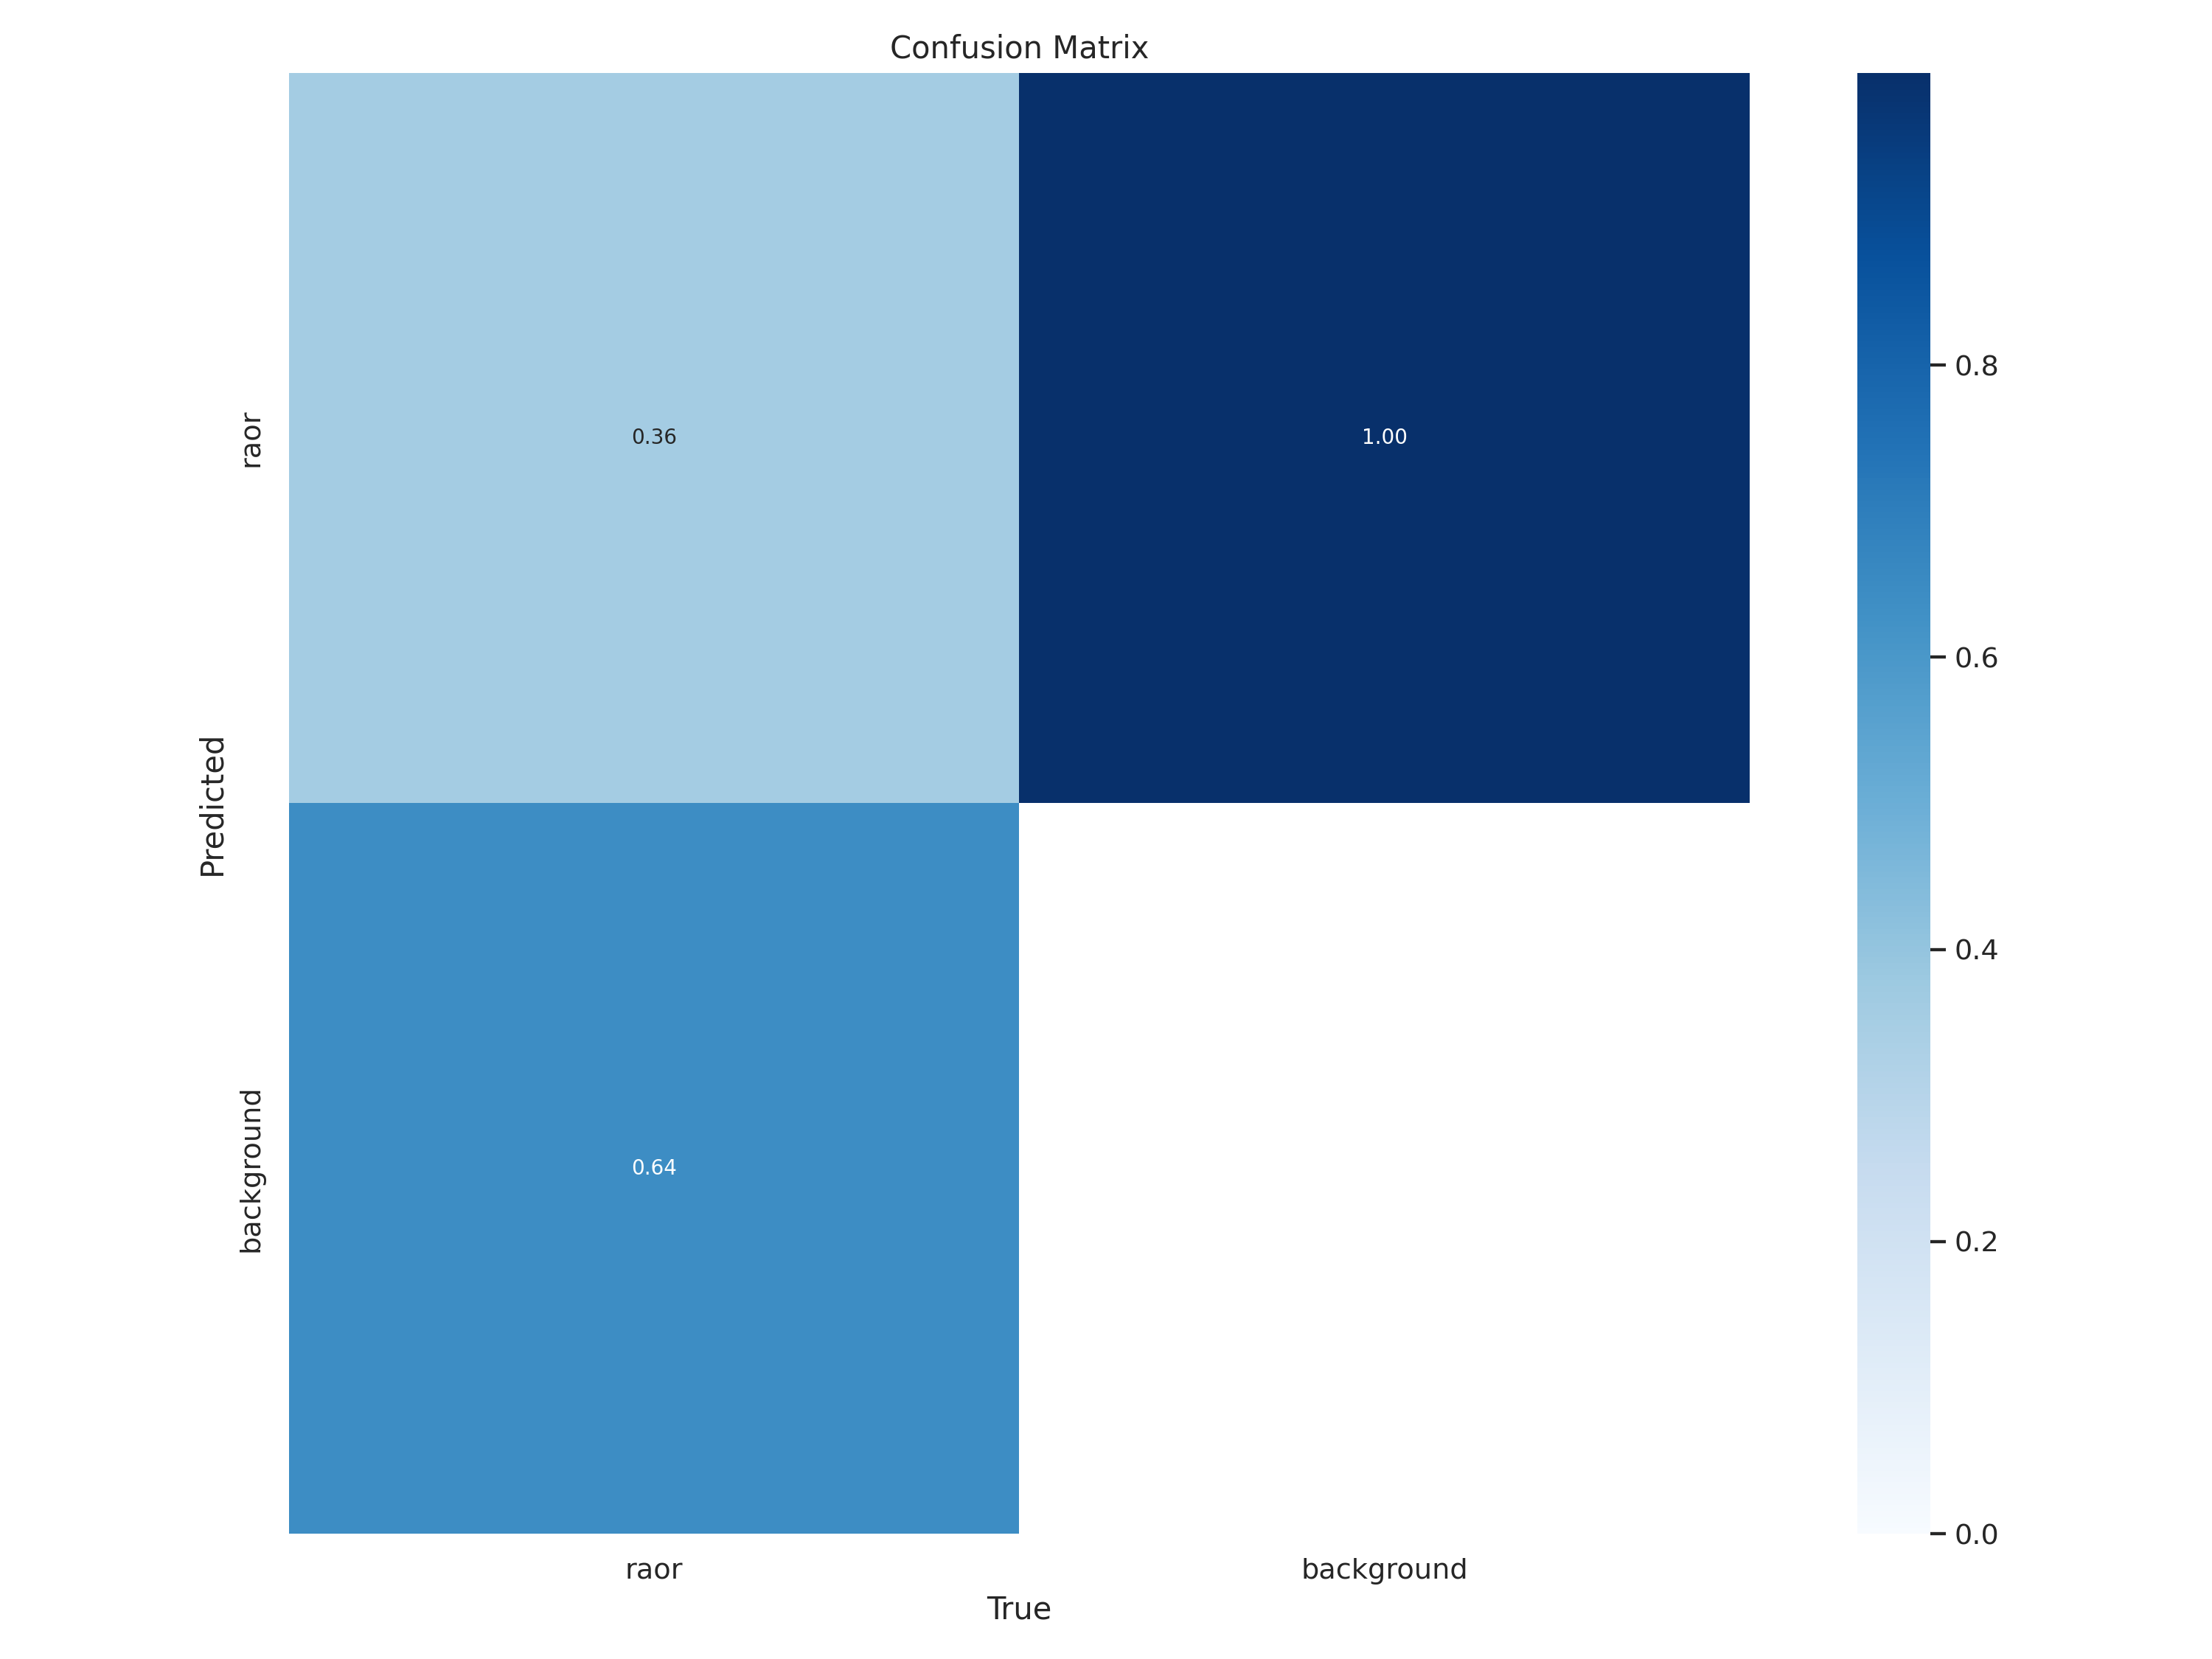

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content/drive/MyDrive/WSprueba


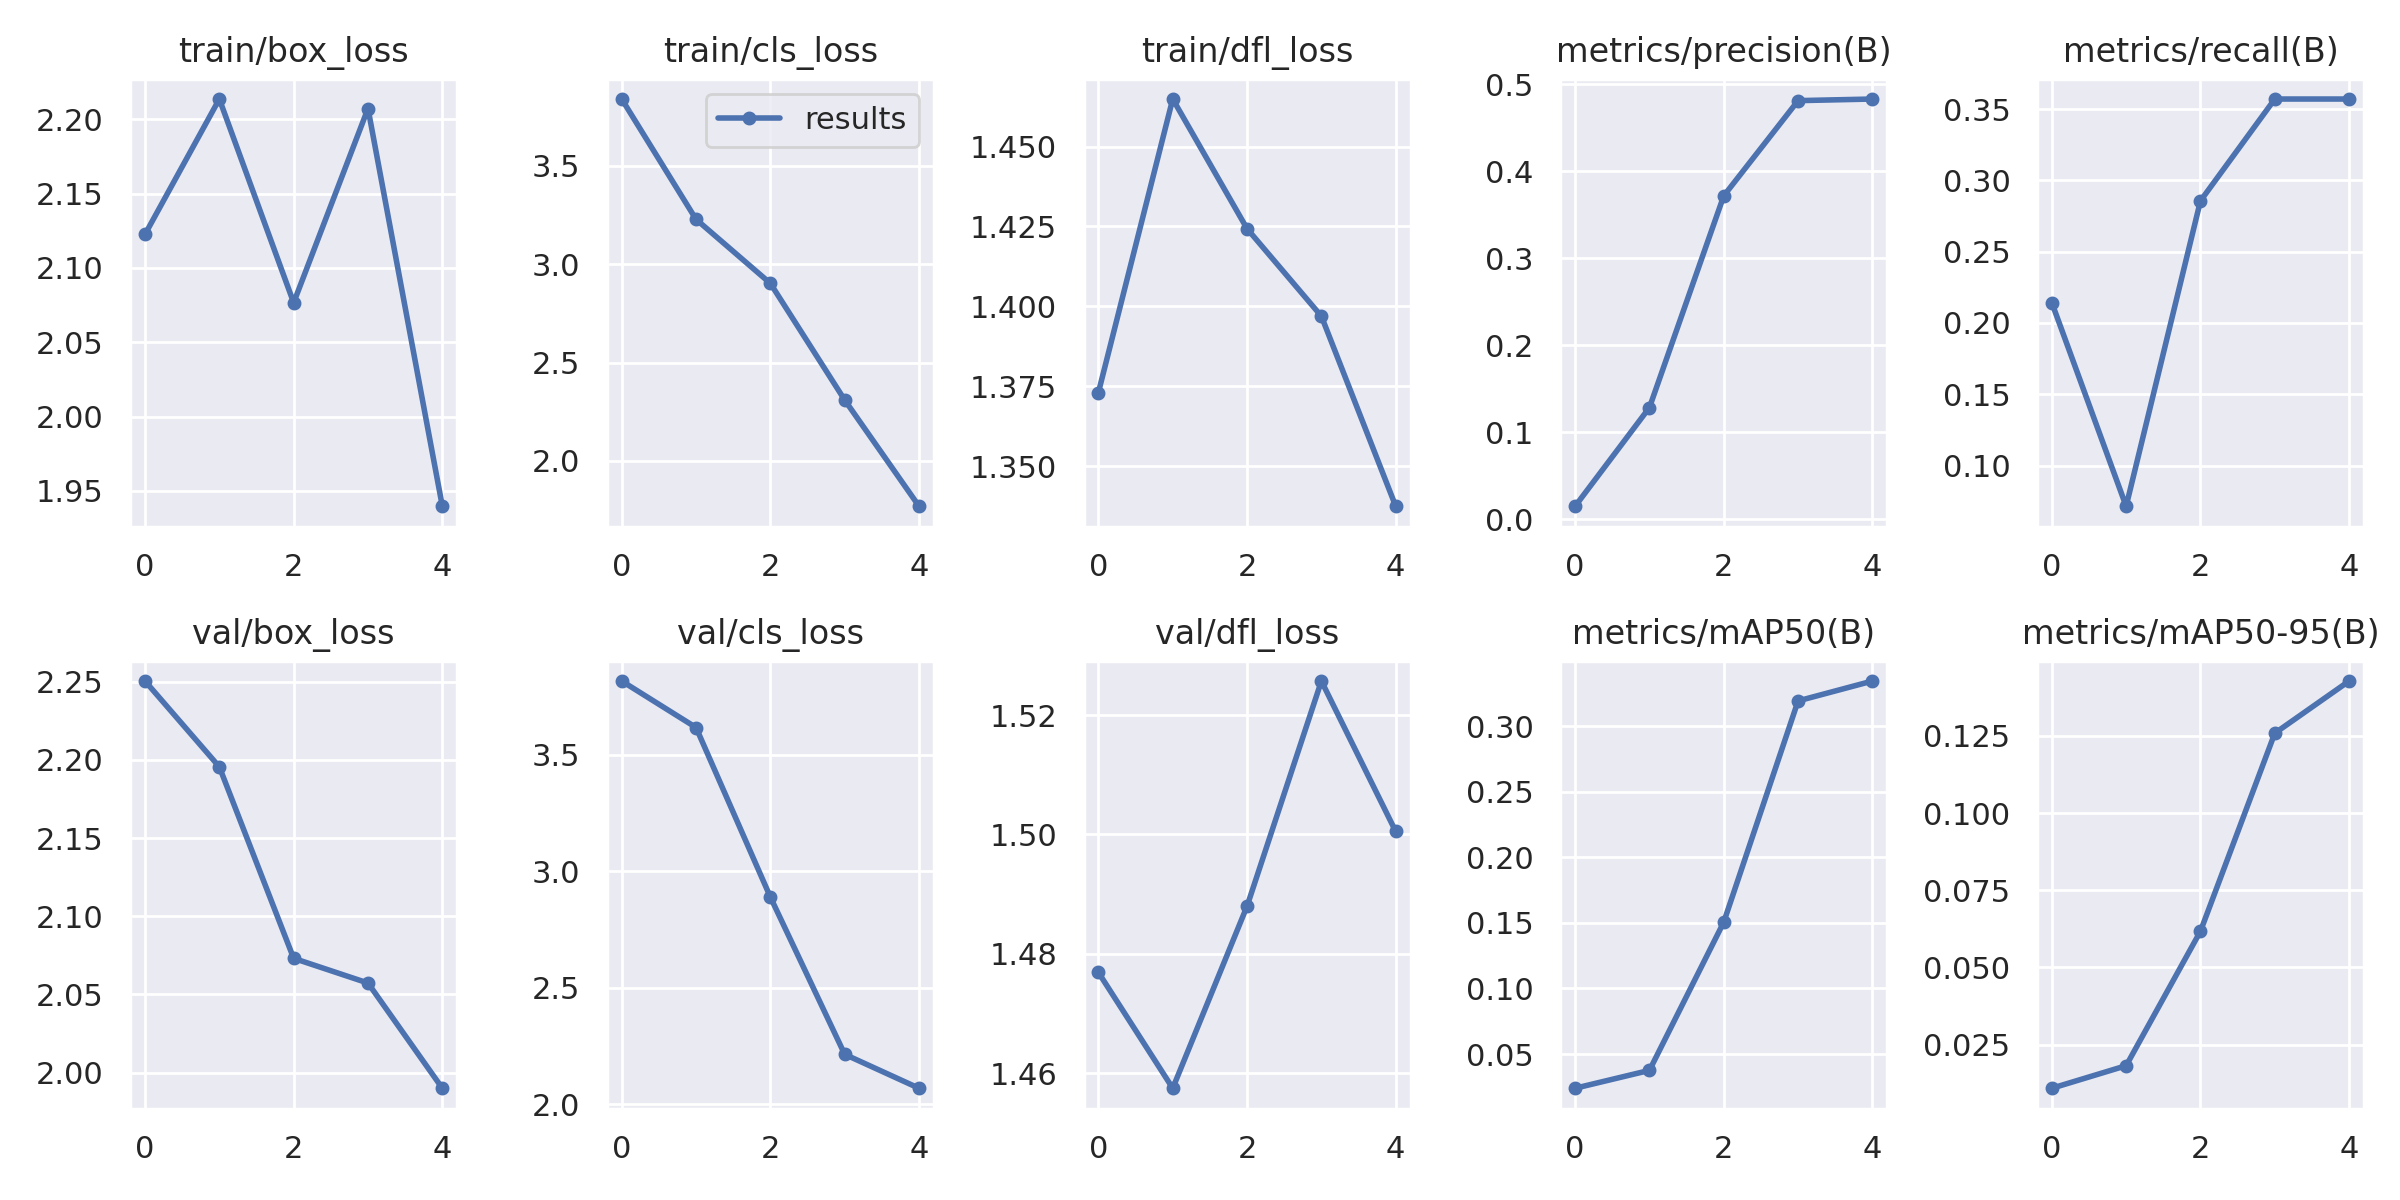

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content/drive/MyDrive/WSprueba
2024-02-19 13:42:32.371755: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-19 13:42:32.371807: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-19 13:42:32.373124: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-19 13:42:33.526218: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/drive/MyDrive/WSpr